## Prediction

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, roc_auc_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve,classification_report
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Train1.0.csv", sep=',',index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, 0 to 4249
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   int64  
 2   number_vmail_messages          4250 non-null   int64  
 3   total_day_minutes              4250 non-null   float64
 4   total_day_calls                4250 non-null   int64  
 5   total_eve_minutes              4250 non-null   float64
 6   total_eve_calls                4250 non-null   int64  
 7   total_night_minutes            4250 non-null   float64
 8   total_night_calls              4250 non-null   int64  
 9   total_intl_minutes             4250 non-null   float64
 10  total_intl_calls               4250 non-null   int64  
 11  number_customer_service_calls  4250 non-null   int64  
 12  churn                          4250 non-null   int64 

In [3]:
X=data.drop('churn',axis=1)
y=data.churn

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
X_train.shape

(3187, 12)

In [6]:
X_test.shape

(1063, 12)

#### Linear Regression

In [7]:
LR = LogisticRegression().fit(X_train,y_train)

In [8]:
round(LR.score(X_test,y_test),4)

0.8692

0.8619447566096883 900


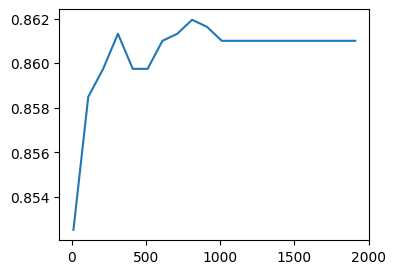

In [9]:
score = []
for i in range(100,2001,100):
    lr = LogisticRegression(max_iter=i,random_state=0)
    score_ = cross_val_score(lr,X_train,y_train,cv=10).mean()
    score.append(score_)
print(max(score),np.arange(100, 2001, 100)[np.argmax(score)])
plt.figure(figsize=(4,3))
plt.plot(range(10,2001,100),score)
plt.show()

0.8647660732241084 0.01


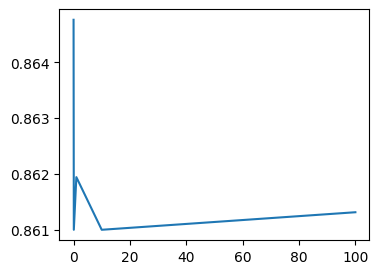

In [10]:
score_2 = []
for i in [0.01, 0.1, 1, 10, 100]:
    lr = LogisticRegression(max_iter=900,C=i, random_state=0)
    score_ = cross_val_score(lr,X_train,y_train,cv=10).mean()
    score_2.append(score_)
print(max(score_2), [0.01, 0.1, 1, 10, 100][np.argmax(score_2)])
plt.figure(figsize=(4,3))
plt.plot([0.01, 0.1, 1, 10, 100],score_2)
plt.show()

0.8647660732241084 lbfgs


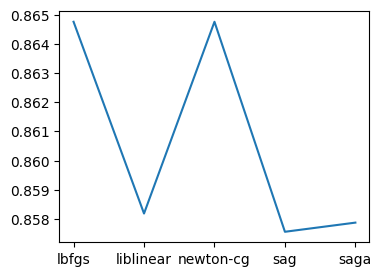

In [11]:
score_3 = []
for i in  ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
    lr = LogisticRegression(max_iter=900,C=0.01, solver=i, random_state=0)
    score_ = cross_val_score(lr,X_train,y_train,cv=10).mean()
    score_3.append(score_)
print(max(score_3),  ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'][np.argmax(score_3)])
plt.figure(figsize=(4,3))
plt.plot( ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],score_3)
plt.show()

In [121]:
LR = LogisticRegression(max_iter=900, C=0.01, solver='lbfgs',random_state=0).fit(X_train,y_train)
round(LR.score(X_test, y_test),4)

0.8758

In [122]:
y_pred = LR.predict(X_test)

In [123]:
round(roc_auc_score(y_test, LR.predict_proba(X_test)[:, 1]),4)

0.8014

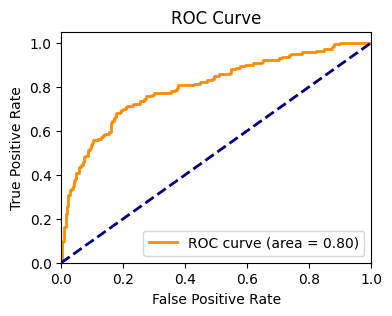

In [124]:
fpr, tpr, _ = roc_curve(y_test, LR.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, LR.predict_proba(X_test)[:, 1])
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

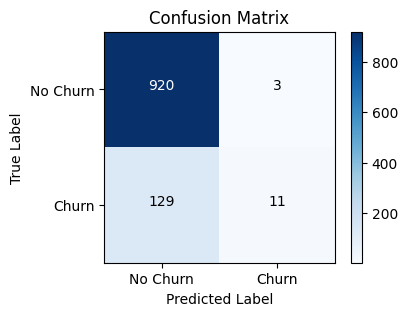

In [125]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.yticks([0, 1], ['No Churn', 'Churn'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       923
           1       0.79      0.08      0.14       140

    accuracy                           0.88      1063
   macro avg       0.83      0.54      0.54      1063
weighted avg       0.86      0.88      0.83      1063



The model performs well in identifying not churned customers, that most of the not churned customers are correctly predicted, and that a high proportion of the true not churned customers are correctly predicted in the samples that are correctly predicted as not churned customers.

But it performs weakly in identifying churned customers, that only a small proportion of churned customers are correctly predicted as churned, and that a low proportion of true churned customers are correctly predicted in the sample of correctly predicted churned customers.

This is most likely due to the uneven distribution of data. Logistic Regression may not be suitable for unbalanced data.

#### Random Forest 

In [18]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
round(clf.score(X_test, y_test),4)

0.9661

In [19]:
score = cross_val_score(clf,X_train,y_train,cv=10).mean()
round(score, 4)

0.9485

In [20]:
round(f1_score(y_test, clf.predict(X_test)),4)

0.8548

In [21]:
round(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]),4)

0.9326

0.9494834486701761 250


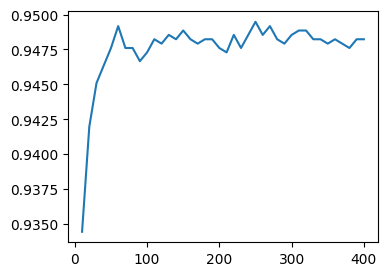

In [22]:
score = []
for i in range(10,401,10):
    rfc = RandomForestClassifier(n_estimators= i,random_state=0)
    score_ = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    score.append(score_)
print(max(score),np.arange(10, 401, 10)[np.argmax(score)])
plt.figure(figsize=(4,3))
plt.plot(range(10,401,10),score)
plt.show()

0.9497979140789811 26


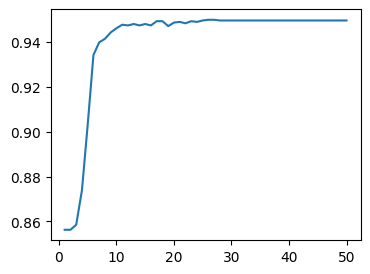

In [23]:
score_2= []
for i in np.arange(1, 51, 1):
    rfc = RandomForestClassifier(n_estimators=250,max_depth= i,random_state=0)
    score_ = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    score_2.append(score_)
print(max(score_2),np.arange(1, 51, 1)[np.argmax(score_2)])
plt.figure(figsize=(4,3))
plt.plot(np.arange(1, 51, 1),score_2)
plt.show()

0.9541846572425623 5


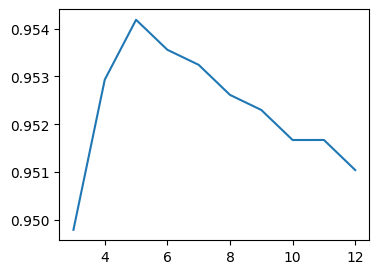

In [24]:
score_4 = []
for i in np.arange(3, 13, 1):
    rfc = RandomForestClassifier(n_estimators= 250,max_depth= 26, max_features=i,random_state=0)
    score_ = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    score_4.append(score_)
print(max(score_4),np.arange(3, 13, 1)[np.argmax(score_4)])
plt.figure(figsize=(4,3))
plt.plot(np.arange(3, 13, 1),score_4)
plt.show()

0.9541846572425623 1


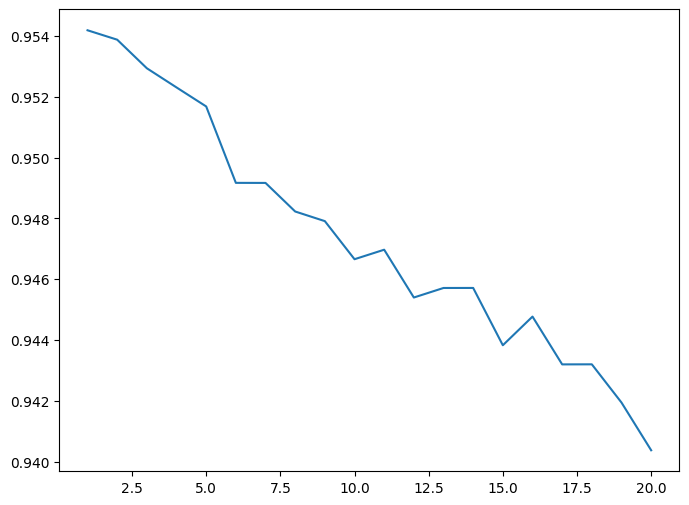

In [25]:
score_3 = []
for i in np.arange(1, 21, 1):
    rfc = RandomForestClassifier(n_estimators= 250,max_depth= 26, max_features= 5,min_samples_leaf = i, random_state=0)
    score_ = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    score_3.append(score_)
print(max(score_3),np.arange(1, 21, 1)[np.argmax(score_3)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, 21, 1),score_3)
plt.show()

0.9541846572425623 2


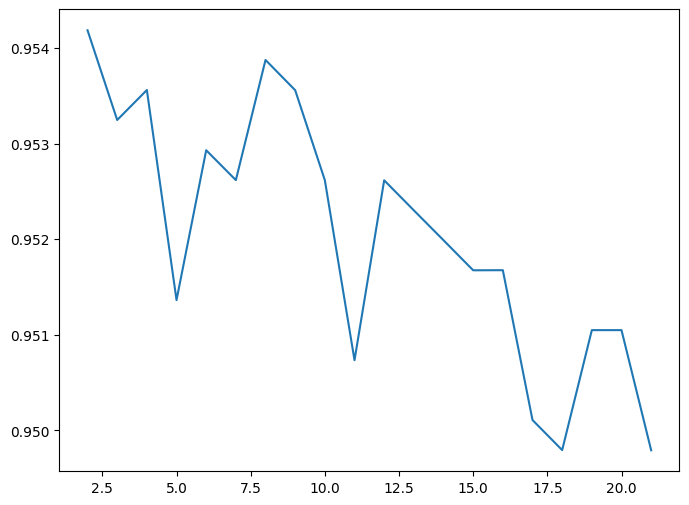

In [26]:
score_5 = []
for i in np.arange(2, 22, 1):
    rfc = RandomForestClassifier(n_estimators= 250,max_depth= 26, max_features=5, min_samples_leaf = 1, min_samples_split= i,random_state=0)
    score_ = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    score_5.append(score_)
print(max(score_5),np.arange(2, 22, 1)[np.argmax(score_5)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(2, 22, 1),score_5)
plt.show()

In [84]:
clf2 = RandomForestClassifier(n_estimators=250
         ,max_depth=26
         ,min_samples_leaf=1
         ,min_samples_split=2
         ,random_state=0
         ,max_features=5
         )
clf2 = clf2.fit(X_train,y_train)

In [85]:
round(clf2.score(X_test,y_test),4)

0.9699

In [86]:
round(f1_score(y_test, clf2.predict(X_test)),4)

0.874

In [87]:
round(roc_auc_score(y_test, clf2.predict_proba(X_test)[:, 1]),4)

0.9381

In [88]:
y_pred = clf2.predict(X_test)

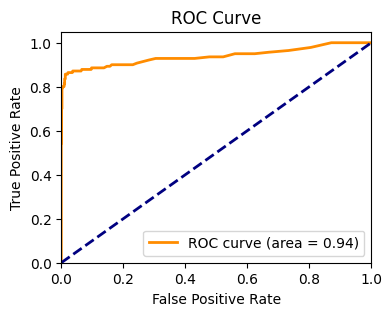

In [89]:
fpr, tpr, _ = roc_curve(y_test, clf2.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, clf2.predict_proba(X_test)[:, 1])
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

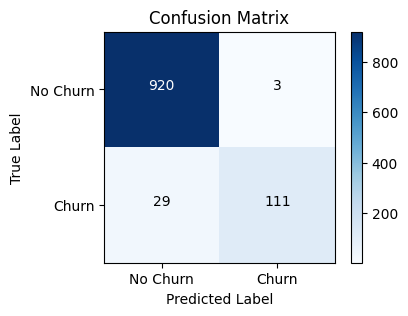

In [90]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.yticks([0, 1], ['No Churn', 'Churn'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       923
           1       0.97      0.79      0.87       140

    accuracy                           0.97      1063
   macro avg       0.97      0.89      0.93      1063
weighted avg       0.97      0.97      0.97      1063



#### Generate Test Result

In [139]:
test_data = pd.read_csv('Test1.0.csv',sep=',',index_col=0)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   account_length                 750 non-null    int64  
 2   international_plan             750 non-null    int64  
 3   number_vmail_messages          750 non-null    int64  
 4   total_day_minutes              750 non-null    float64
 5   total_day_calls                750 non-null    int64  
 6   total_eve_minutes              750 non-null    float64
 7   total_eve_calls                750 non-null    int64  
 8   total_night_minutes            750 non-null    float64
 9   total_night_calls              750 non-null    int64  
 10  total_intl_minutes             750 non-null    float64
 11  total_intl_calls               750 non-null    int64  
 12  number_customer_service_calls  750 non-null    int64  


In [140]:
pre_data = test_data.drop('id',axis=1)
prediction_LR = LR.predict(pre_data)

In [141]:
result_LR = pd.DataFrame()
result_LR['id'] = test_data['id']
result_LR['churn'] = prediction_LR 
result_LR.head(10)

,id,churn
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [142]:
result_LR.set_index(result_LR.columns[0], inplace=True)
result_LR['churn'] = result_LR['churn'].replace({1:'yes', 0:'no'})
result_LR.to_csv('ResultLR.csv')

In [143]:
prediction_RF = clf.predict(pre_data)

In [144]:
result_RF = pd.DataFrame()
result_RF['id'] = test_data['id']
result_RF['churn'] = prediction_RF
result_RF.head(10)

,id,churn
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,1


In [145]:
result_RF.set_index(result_RF.columns[0], inplace=True)
result_RF['churn'] = result_RF['churn'].replace({1:'yes', 0:'no'})
result_RF.to_csv('ResultRF.csv')